<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Lendenclub_borrower_NLP_STATS_KEYWORDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/ACESS DATA/APP REVIEWS/APP SCRAPING/lendenclubborrower.csv')

In [6]:
df.head()

,content,sentiment,reviews_score
0,Waste of time,negative,1
1,It's fakes app 199 pay but not approves loan,negative,1
2,Very bad experience from lendenclub ...my loan...,negative,1
3,"Kudos team instamoney for such an ideal work ,...",positive,5
4,I am pancard already registered pls help,positive,5


In [7]:
df.shape

(8792, 3)

In [8]:
df.columns

Index(['content', 'sentiment', 'reviews_score'], dtype='object')

In [9]:
df=df.loc[df['sentiment'] == 'negative']

In [10]:
df.shape

(2777, 3)

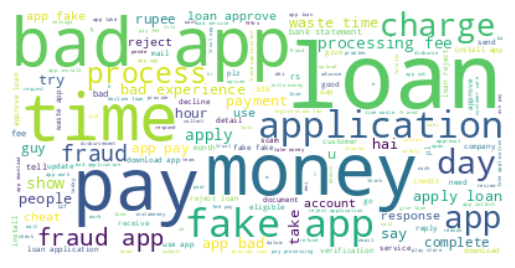

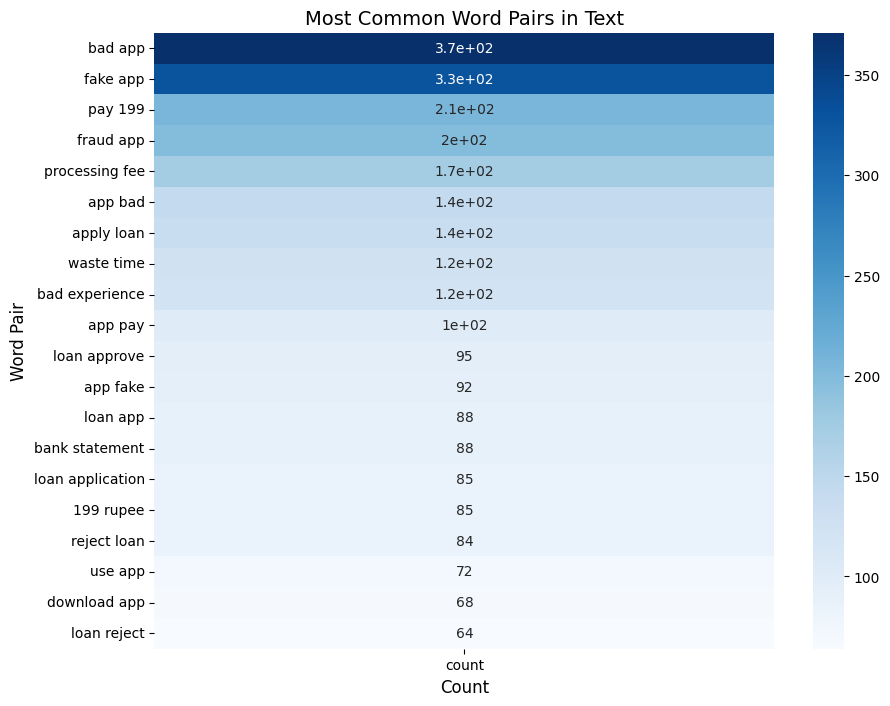

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, 

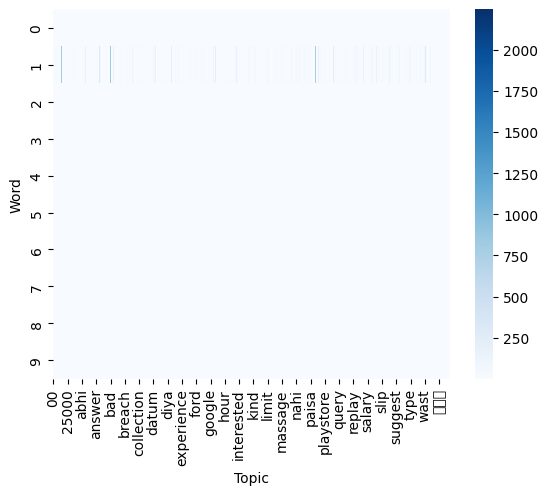

In [11]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from itertools import combinations

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Load the reviews into a pandas DataFrame
df = df

# Define a function to lemmatize text
def lemmatize(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmas)

# Lemmatize the review column
df['review_lemmatized'] = df['content'].apply(lemmatize)

# Define a function to get the sentiment of text
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Get the sentiment of the review column
df['sentiment'] = df['content'].apply(get_sentiment)

# Define a function to get the entities in text
def get_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Get the entities in the review column
df['entities'] = df['content'].apply(get_entities)

# Define a function to create a word cloud from text
def create_wordcloud(text):
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Create a word cloud of the most common words in the review column
text = ' '.join(df['review_lemmatized'])
create_wordcloud(text)

# Define a function to create a heatmap of the most common word combinations in text
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Define a function to create a heatmap of the most common word combinations in text
def create_heatmap(text):
    vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000, stop_words='english')
    X = vectorizer.fit_transform([text])
    word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_freq_df = word_freq_df.transpose()
    word_freq_df.columns = ['count']
    word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
    top_word_pairs = word_freq_df.head(20)
    plt.figure(figsize=(10,8))
    sns.heatmap(top_word_pairs, cmap='Blues', annot=True)
    plt.title('Most Common Word Pairs in Text', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Word Pair', fontsize=12)
    plt.show()


# Create a heatmap of the most common word pairs in the review column
create_heatmap(text)

# Define a function to perform topic modeling on text
def perform_topic_modeling(text):
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform([text])
    lda = LatentDirichletAllocation(n_components=10, random_state=42)
    lda.fit(X)
    topic_words = vectorizer.get_feature_names_out()
    topic_word_distributions = pd.DataFrame(lda.components_, columns=topic_words)
    sns.heatmap(topic_word_distributions, cmap='Blues')
    plt.xlabel('Topic')
    plt.ylabel('Word')
    plt.show()

# Perform topic modeling on the review column
perform_topic_modeling(text)

